In [1]:
# Importando as bibliotecas
import pandas as pd

#from google_drive_downloader import GoogleDriveDownloader as gdd

# Plot dos gráficos
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
import seaborn as sns

In [2]:
# data_google_id = '1NJFQz6-nuouztYvbehpQa_8-fp'
# gdd.download_file_from_google_drive(file_id=data_google_id,
#                                     dest_path = './feed.csv',
#                                     showsize = True)
dados = pd.read_csv("feed.csv", sep=',')

In [17]:
dados.head()

,created_at,entry_id,field1
0,2023-11-17 13:23:27+00:00,1,34.7
1,2023-11-17 14:25:19+00:00,2,33.6
2,2023-11-17 14:25:52+00:00,3,33.6
3,2023-11-17 14:26:26+00:00,4,32.6
4,2023-11-17 14:26:59+00:00,5,34.7


In [3]:
dados.describe()

,entry_id,field1
count,318.000000,318.000000
mean,159.500000,31.331132
std,91.942917,3.868575
min,1.000000,19.900000
25%,80.250000,28.825000
50%,159.500000,31.750000
75%,238.750000,34.075000
max,318.000000,38.000000


Text(0.5, 1.0, 'Temperaturas')

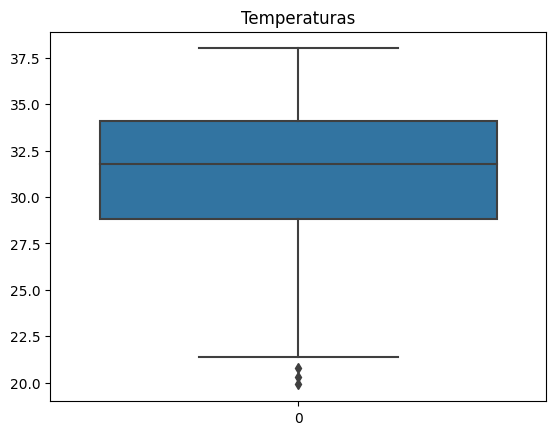

In [18]:
sns.boxplot(dados['field1']).set_title('Temperaturas')

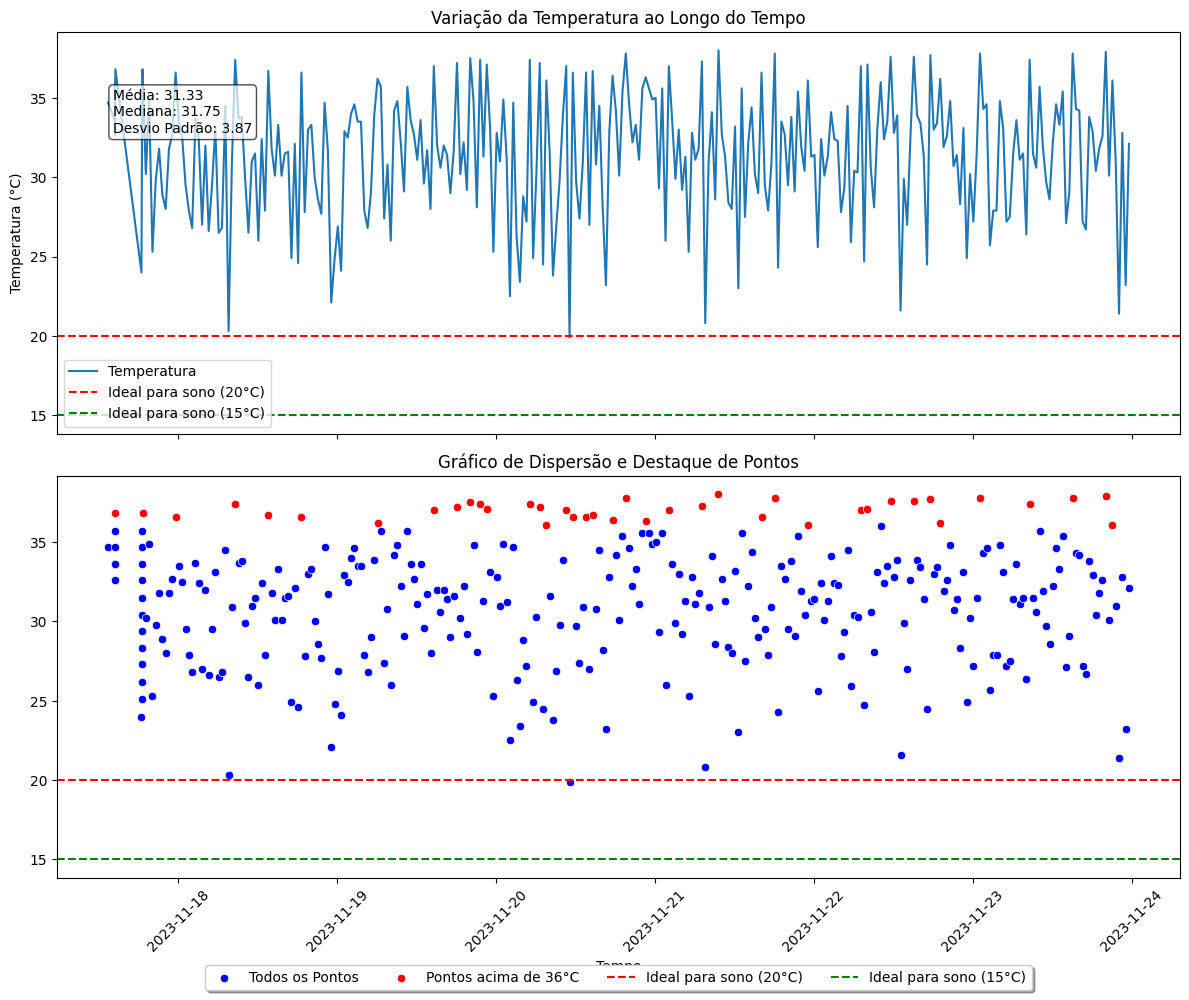

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leitura dos dados do CSV
dados = pd.read_csv('feed.csv', parse_dates=['created_at'])

# Estatísticas descritivas
estatisticas_descritivas = dados['field1'].describe()

# Visualização combinada: gráfico de variação da temperatura ao longo do tempo e gráfico de dispersão
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Gráfico de linha de variação da temperatura ao longo do tempo
sns.lineplot(x='created_at', y='field1', data=dados, label='Temperatura', ax=ax1)
ax1.axhline(y=20, color='r', linestyle='--', label='Ideal para sono (20°C)')
ax1.axhline(y=15, color='g', linestyle='--', label='Ideal para sono (15°C)')
ax1.set_ylabel('Temperatura (°C)')
ax1.set_title('Variação da Temperatura ao Longo do Tempo')
ax1.legend()

# Adicionando estatísticas descritivas no gráfico de linha
ax1.annotate(
    f'Média: {estatisticas_descritivas["mean"]:.2f}\nMediana: {estatisticas_descritivas["50%"]:.2f}\nDesvio Padrão: {estatisticas_descritivas["std"]:.2f}',
    xy=(0.05, 0.75),
    xycoords='axes fraction',
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
)

# Gráfico de dispersão com destaque de pontos específicos
scatter = sns.scatterplot(x='created_at', y='field1', data=dados, ax=ax2, color='blue', label='Todos os Pontos')
sns.scatterplot(x='created_at', y='field1', data=dados[dados['field1'] > 36], color='red', label='Pontos acima de 36°C')
ax2.axhline(y=20, color='r', linestyle='--', label='Ideal para sono (20°C)')
ax2.axhline(y=15, color='g', linestyle='--', label='Ideal para sono (15°C)')
ax2.set_xlabel('Tempo')
ax2.set_ylabel('Temperatura (°C)')
ax2.set_title('Gráfico de Dispersão e Destaque de Pontos')
ax2.legend()

# Adicionar legenda horizontal do período de tempo abaixo do gráfico de dispersão
scatter.set(ylabel='')  # Limpar a legenda padrão do eixo y no gráfico de dispersão
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=5)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


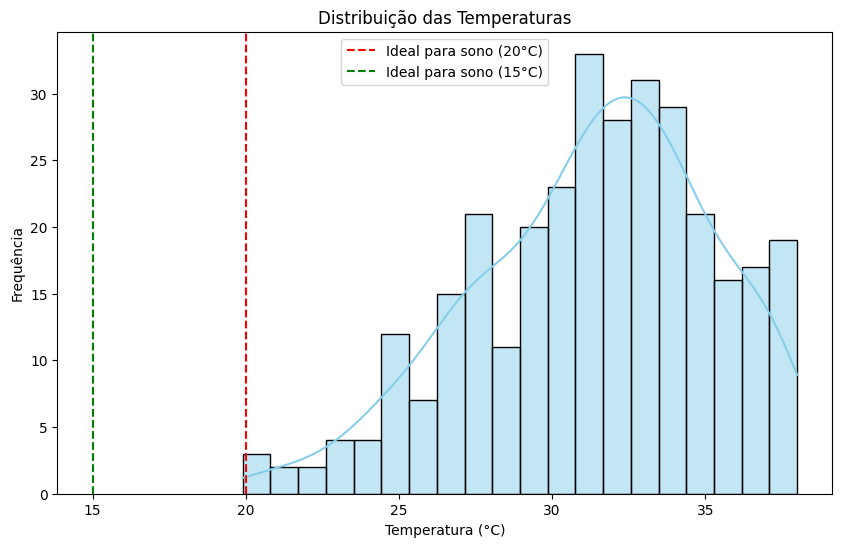

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leitura dos dados do CSV
dados = pd.read_csv('feed.csv', parse_dates=['created_at'])

# Histograma da distribuição das temperaturas
plt.figure(figsize=(10, 6))
sns.histplot(data=dados, x='field1', bins=20, kde=True, color='skyblue')
plt.axvline(x=20, color='r', linestyle='--', label='Ideal para sono (20°C)')
plt.axvline(x=15, color='g', linestyle='--', label='Ideal para sono (15°C)')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frequência')
plt.title('Distribuição das Temperaturas')
plt.legend()
plt.show()
